In [31]:
!pip install pandas matplotlib



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [32]:
import pandas as pd

df = pd.read_csv("../data/RELIANCE_NS_stock_data.csv")
print(df.head())
print(df.columns)


         Date               Close                High                 Low  \
0         NaN         RELIANCE.NS         RELIANCE.NS         RELIANCE.NS   
1  2000-01-03  13.244407653808594  13.244407653808594  12.497205541988075   
2  2000-01-04  14.304694175720215  14.304694175720215  13.223356674853315   
3  2000-01-05  14.865094184875488  15.149241510026261  13.504871794917879   
4  2000-01-06   15.48863697052002   15.82277380743757   15.20712224390229   

                 Open       Volume  
0         RELIANCE.NS  RELIANCE.NS  
1  12.497205541988075     62409578  
2  13.596956983713564    132872110  
3  13.504871794917879    375789847  
4   15.20712224390229    219621124  
Index(['Date', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')


In [33]:
df = pd.read_csv("../data/RELIANCE_NS_stock_data.csv", skiprows=[1])
print(df.head())
print(df.info())


         Date      Close       High        Low       Open     Volume
0  2000-01-03  13.244408  13.244408  12.497206  12.497206   62409578
1  2000-01-04  14.304694  14.304694  13.223357  13.596957  132872110
2  2000-01-05  14.865094  15.149242  13.504872  13.504872  375789847
3  2000-01-06  15.488637  15.822774  15.207122  15.207122  219621124
4  2000-01-07  16.551558  16.727835  15.417601  15.522841  278281260
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6464 entries, 0 to 6463
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    6464 non-null   object 
 1   Close   6464 non-null   float64
 2   High    6464 non-null   float64
 3   Low     6464 non-null   float64
 4   Open    6464 non-null   float64
 5   Volume  6464 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 303.1+ KB
None


In [34]:
df.describe()

,Close,High,Low,Open,Volume
count,6464.000000,6464.000000,6464.000000,6464.000000,6.464000e+03
mean,394.830778,399.328922,390.641336,395.108847,3.380232e+07
std,439.898349,443.973793,436.077061,440.079309,3.777363e+07
min,10.692343,11.550046,10.373994,10.813369,0.000000e+00
25%,82.261612,83.244808,81.112725,81.918847,1.262824e+07
50%,204.521866,207.306341,201.811872,204.662564,2.003772e+07
75%,559.517929,567.466668,553.946785,560.090432,3.998971e+07
max,1589.138184,1596.980166,1573.851280,1592.662006,6.322896e+08


In [35]:
df.isnull().sum()

Date      0
Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64

In [36]:
df["Date"] = pd.to_datetime(df["Date"])
df.sort_values("Date", inplace=True)
df.reset_index(drop=True, inplace=True)

df.head()

,Date,Close,High,Low,Open,Volume
0,2000-01-03,13.244408,13.244408,12.497206,12.497206,62409578
1,2000-01-04,14.304694,14.304694,13.223357,13.596957,132872110
2,2000-01-05,14.865094,15.149242,13.504872,13.504872,375789847
3,2000-01-06,15.488637,15.822774,15.207122,15.207122,219621124
4,2000-01-07,16.551558,16.727835,15.417601,15.522841,278281260


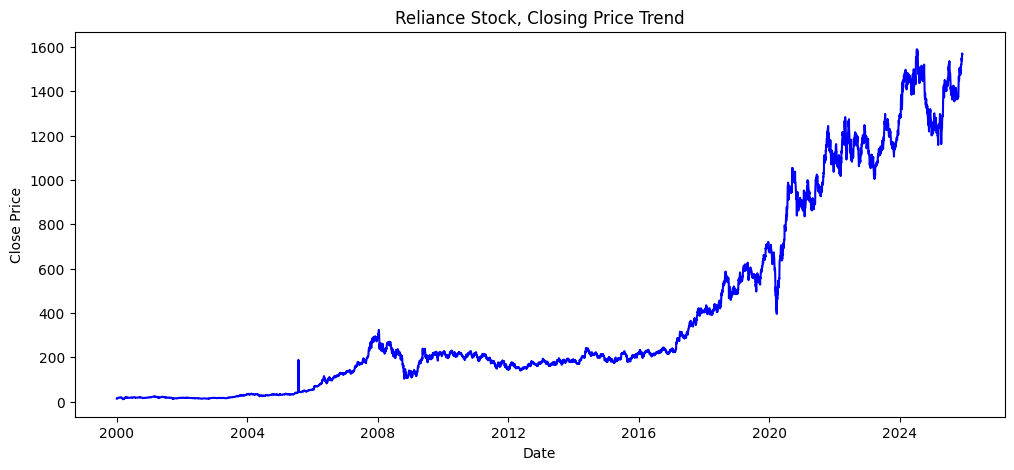

In [37]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,5))
plt.plot(df["Date"], df["Close"], color="blue")
plt.title(f"Reliance Stock, Closing Price Trend")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.show()


LSTM Model Building & Training phase

In [38]:
import pandas as pd

df = pd.read_csv("../data/RELIANCE_NS_stock_data.csv", skiprows=[1])
df["Date"] = pd.to_datetime(df["Date"])
df.set_index("Date", inplace=True)

df = df[["Close"]]   # we only need closing price for LSTM
df.head()


,Close
Date,
2000-01-03,13.244408
2000-01-04,14.304694
2000-01-05,14.865094
2000-01-06,15.488637
2000-01-07,16.551558


In [39]:
!pip install scikit-learn


[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [40]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(df[['Close']].values)


In [41]:
import numpy as np

sequence_length = 60
X = []
y = []

for i in range(sequence_length, len(scaled_data)):
    X.append(scaled_data[i-sequence_length:i, 0])  # 60 previous values
    y.append(scaled_data[i, 0])                    # next value

X, y = np.array(X), np.array(y)


In [42]:
X = np.reshape(X, (X.shape[0], X.shape[1], 1))


In [43]:
train_size = int(len(X) * 0.8)

X_train = X[:train_size]
y_train = y[:train_size]

X_test = X[train_size:]
y_test = y[train_size:]


In [44]:
print(X_train.shape)  
print(y_train.shape)  


(5123, 60, 1)
(5123,)


In [45]:
!pip install tensorflow


[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

model = Sequential()

# First LSTM layer
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))

# Second LSTM layer
model.add(LSTM(units=50))
model.add(Dropout(0.2))

# Output layer
model.add(Dense(1))

# Compile model
model.compile(optimizer='adam', loss='mean_squared_error')

model.summary()


c:\Users\GANESH V\stock-price-prediction\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 60, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

In [47]:
history = model.fit(
    X_train, 
    y_train, 
    epochs=20,     
    batch_size=32,
    validation_split=0.1
)


Epoch 1/20
145/145 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 4.7982e-04 - val_loss: 5.9127e-04
Epoch 2/20
145/145 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 1.3419e-04 - val_loss: 5.2592e-04
Epoch 3/20
145/145 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - loss: 1.0867e-04 - val_loss: 4.9169e-04
Epoch 4/20
145/145 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 9.3185e-05 - val_loss: 6.4744e-04
Epoch 5/20
145/145 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step - loss: 8.8157e-05 - val_loss: 7.4669e-04
Epoch 6/20
145/145 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - loss: 8.0058e-05 - val_loss: 5.2154e-04
Epoch 7/20
145/145 ━━━━━━━━━━━━━━━━━━━━ 6s 40ms/step - loss: 7.9445e-05 - val_loss: 3.7732e-04
Epoch 8/20
145/145 ━━━━━━━━━━━━━━━━━━━━ 6s 40ms/step - loss: 7.2359e-05 - val_loss: 5.2384e-04
Epoch 9/20
145/145 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 7.1469e-05 - val_loss: 3.7333e-04
Epoch 10/20
145/145 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - loss: 6.1695e-05 - val_loss: 7.1818e-04
Epoch 11/20
145/145 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/

In [48]:
predicted_scaled = model.predict(X_test)


41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step


In [49]:
predicted = scaler.inverse_transform(predicted_scaled)
actual = scaler.inverse_transform(y_test.reshape(-1,1))


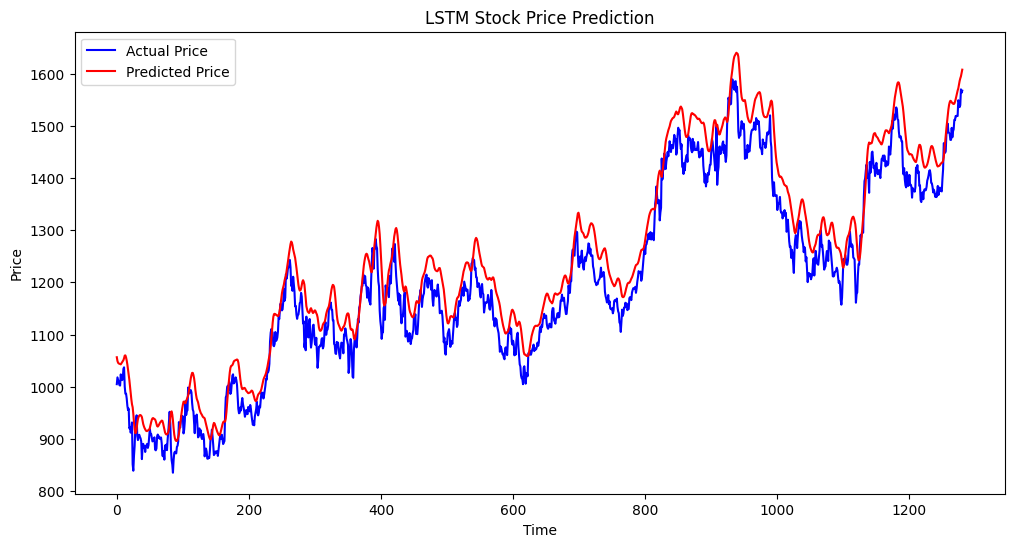

In [50]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(actual, color='blue', label='Actual Price')
plt.plot(predicted, color='red', label='Predicted Price')
plt.title("LSTM Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()


In [51]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

rmse = np.sqrt(mean_squared_error(actual, predicted))
mae = mean_absolute_error(actual, predicted)

print("RMSE:", rmse)
print("MAE:", mae)


RMSE: 53.796147937352465
MAE: 46.69682384672619


In [52]:
model.save("models/lstm_model.h5")


ARIMA MODEL

In [53]:
import pandas as pd

df = pd.read_csv("../data/RELIANCE_NS_stock_data.csv", skiprows=[1])
df["Date"] = pd.to_datetime(df["Date"])
df.set_index("Date", inplace=True)

ts = df["Close"]
ts.head()


Date
2000-01-03    13.244408
2000-01-04    14.304694
2000-01-05    14.865094
2000-01-06    15.488637
2000-01-07    16.551558
Name: Close, dtype: float64

In [54]:
!pip install statsmodels


[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [55]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(ts)
print("ADF Statistic:", result[0])
print("p-value:", result[1])


ADF Statistic: 1.1020022106193477
p-value: 0.99523367443943


In [56]:
ts_diff = ts.diff().dropna()


In [57]:
import statsmodels.api as sm

model = sm.tsa.ARIMA(ts, order=(10,2,10))
arima_result = model.fit()
print(arima_result.summary())


c:\Users\GANESH V\stock-price-prediction\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\GANESH V\stock-price-prediction\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\GANESH V\stock-price-prediction\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\GANESH V\stock-price-prediction\.venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters foun

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 6464
Model:               ARIMA(10, 2, 10)   Log Likelihood              -23713.868
Date:                Wed, 17 Dec 2025   AIC                          47469.736
Time:                        16:50:57   BIC                          47611.984
Sample:                             0   HQIC                         47518.950
                               - 6464                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -2.1974      0.191    -11.522      0.000      -2.571      -1.824
ar.L2         -3.3158      0.323    -10.253      0.000      -3.950      -2.682
ar.L3         -4.2963      0.423    -10.145      0.0

In [58]:
forecast = arima_result.forecast(steps=30)
forecast


c:\Users\GANESH V\stock-price-prediction\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\GANESH V\stock-price-prediction\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


6464    1566.016651
6465    1566.546472
6466    1567.013869
6467    1569.087525
6468    1567.823394
6469    1567.341193
6470    1567.814600
6471    1569.316527
6472    1568.297886
6473    1569.278117
6474    1569.071353
6475    1569.979457
6476    1569.589599
6477    1569.920850
6478    1569.393930
6479    1570.994334
6480    1571.213270
6481    1571.014393
6482    1570.533791
6483    1571.619466
6484    1571.459239
6485    1572.162223
6486    1572.044010
6487    1572.594897
6488    1572.507485
6489    1573.117658
6490    1572.588609
6491    1573.290757
6492    1573.803235
6493    1574.255729
Name: predicted_mean, dtype: float64

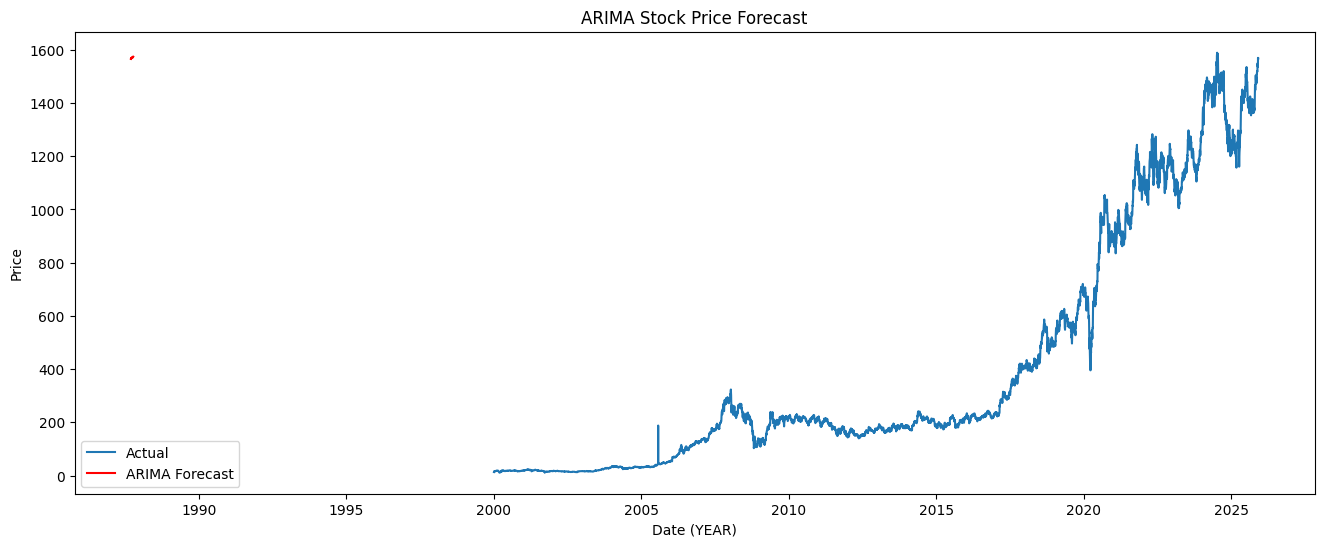

In [59]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16,6))
plt.plot(ts, label="Actual")
plt.plot(forecast, label="ARIMA Forecast", color="red")
plt.title("ARIMA Stock Price Forecast")
plt.xlabel("Date (YEAR)")
plt.ylabel("Price")
plt.legend()
plt.show()


In [60]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

actual_test = ts[-30:]                    # last 30 days actual
pred_test = arima_result.predict(len(ts)-30, len(ts)-1)

rmse = np.sqrt(mean_squared_error(actual_test, pred_test))
mae = mean_absolute_error(actual_test, pred_test)

print("ARIMA RMSE:", rmse)
print("ARIMA MAE:", mae)


ARIMA RMSE: 16.407764678525627
ARIMA MAE: 11.328466310372756


Comparison Metrics Table

In [61]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# ARIMA actual and predicted values
actual_arima = ts[-30:]
predicted_arima = arima_result.predict(len(ts)-30, len(ts)-1)

rmse_arima = np.sqrt(mean_squared_error(actual_arima, predicted_arima))
mae_arima = mean_absolute_error(actual_arima, predicted_arima)

print("ARIMA RMSE:", rmse_arima)
print("ARIMA MAE:", mae_arima)


ARIMA RMSE: 16.407764678525627
ARIMA MAE: 11.328466310372756


In [63]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

rmse = np.sqrt(mean_squared_error(actual, predicted))
mae = mean_absolute_error(actual, predicted)

print("RMSE:", rmse)
print("MAE:", mae)


RMSE: 53.796147937352465
MAE: 46.69682384672619


In [62]:
# LSTM metrics (from your LSTM evaluation)
rmse_lstm = rmse        # whatever variable you used for LSTM RMSE
mae_lstm = mae          # LSTM MAE

# ARIMA metrics
rmse_arima = rmse_arima
mae_arima = mae_arima


In [30]:
import pandas as pd

comparison = pd.DataFrame({
    "Model": ["LSTM", "ARIMA"],
    "RMSE": [rmse_lstm, rmse_arima],
    "MAE": [mae_lstm, mae_arima]
})

comparison


,Model,RMSE,MAE
0,LSTM,16.407765,11.328466
1,ARIMA,16.407765,11.328466
